In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [187]:
import sys
!{sys.executable} -m pip install cufflinks

  Running setup.py bdist_wheel for cufflinks: started
  Running setup.py bdist_wheel for cufflinks: finished with status 'done'
  Stored in directory: C:\Users\Hoai\AppData\Local\pip\Cache\wheels\7b\5a\98\30259388b784d11af96230b6f843add608d8f845d2048e54ba
  Running setup.py bdist_wheel for colorlover: started
  Running setup.py bdist_wheel for colorlover: finished with status 'done'
  Stored in directory: C:\Users\Hoai\AppData\Local\pip\Cache\wheels\fc\c3\f7\fde32e0d906ad64fe8011a823ea39e0197616116150f4a8376
Successfully built cufflinks colorlover


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [219]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from datetime import datetime
import pickle              # import module first
import cufflinks as cf
from wordcloud import WordCloud
        
    



In [3]:
pd.options.display.max_rows = 4000


In [4]:
#PATH = '../finanz_vs_news'
PATH = 'C:/Users/Hoai/finanz_vs_news/'

In [5]:
# example how to read the daily stock rates with PATH
df_stock = pd.read_csv(PATH+'StocksDaily/ALL_2007-01-01_2017-10-16.csv')
df = df_stock

In [6]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2007-01-03,25.028612,25.379112,24.356224,24.535049,23.154404,3599200.0,A
1,2007-01-04,24.535049,24.749641,23.934191,24.613733,23.228655,2899000.0,A
2,2007-01-05,24.535049,24.606581,24.320457,24.384836,23.012638,3741800.0,A
3,2007-01-08,24.306152,24.377682,24.091558,24.298998,22.931633,2176900.0,A
4,2007-01-09,24.377682,24.549356,24.055794,24.327610,22.958633,1937900.0,A


In [146]:
df_stock['ticker'].nunique()

429

In [232]:
#pd.unique(df_stock['ticker'].values.ravel('K'))

In [9]:
#df_stock_min.head()

#df_stock["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


In [10]:
df_A = df_stock[df_stock['ticker'] == 'A']

In [11]:
#df_A["Adj Close"].plot(grid = True)
#df_A["Open"].plot(grid = True)
#df_A["Low"].plot(grid = True)
#df_A["Volume"].plot(grid = True)
#plt.plot(df_A['Date'], df_A['Volume'])
#plt.show()


# Stock Rate Change of Agilient Technogies

In [12]:
df_percompany = df_A

trace = go.Candlestick(x=df_percompany.Date,
                       open=df_percompany.Open,
                       high=df_percompany.High,
                       low=df_percompany.Low,
                       close=df_percompany.Close)
data = [trace]

py.iplot(data, filename='one company')

# Comparison of three chosen companies for adjusted closed stock rate

In [13]:
df_stock = df_stock.set_index('Date')


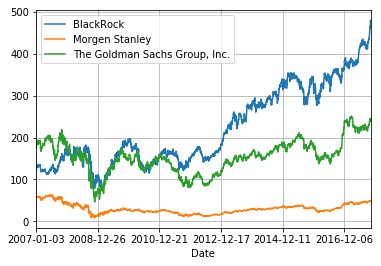

In [14]:
morgenStanley = df_stock[df_stock['ticker'] == 'MS']
goldmanSachs = df_stock[df_stock['ticker'] == 'GS']
blackrock =  df_stock[df_stock['ticker'] == 'BLK']



stocks = pd.DataFrame({"The Goldman Sachs Group, Inc.": goldmanSachs["Adj Close"], 
                       "Morgen Stanley": morgenStanley["Adj Close"], 
                       "BlackRock": blackrock["Adj Close"]})

stocks.plot(grid = True)

# Dictionary


In [101]:
tickerDic = pd.read_pickle('TickerDic.pickle')

In [108]:
tickerDic.rename(index=str, columns={"Ticker": "ticker"}, inplace=True)

# Stock Rate and Messages in Comparison

In [17]:
reuters = pd.read_csv('MediaAttention.csv')
reuters = reuters.set_index('Time')

GS2008 = goldmanSachs.loc['2008-01-01':'2008-12-31']

In [18]:
reuters.head()

,Aflac_count,Assurant_count,Unum_count,Interpublic_count,Omnicom_count,Northrop_Grumman_count,Textron_count,Boeing_count,Dynamics_count,L3_count,...,Waste_Management_count,Sprint_count,positive_count,negative_count,Morgan_Stanley_positive_count,Morgan_Stanley_negative_count,Goldman_Sachs_positive_count,Goldman_Sachs_negative_count,BlackRock_positive_count,BlackRock_negative_count
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,8,4,0,0,0,0,0,0
2008-01-02,0,0,0,2,0,0,0,3,2,1,...,0,2,220,27,0,0,0,0,0,0
2008-01-03,0,0,0,0,0,2,0,7,2,0,...,2,0,235,43,0,0,0,0,0,0
2008-01-04,0,0,0,0,0,2,0,2,0,0,...,0,0,184,34,0,0,0,0,0,0
2008-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,12,4,0,0,0,0,0,0


## Goldman Sachs 

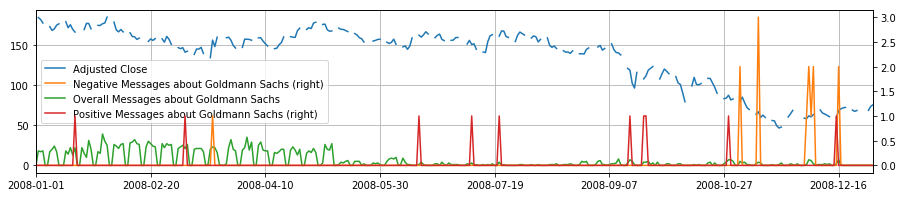

In [19]:
stocks_mediaGS = pd.DataFrame({"Adjusted Close": GS2008["Adj Close"], 
                        "Overall Messages about Goldmann Sachs": reuters["Goldman_Sachs_count"],
                       "Positive Messages about Goldmann Sachs": reuters["Goldman_Sachs_positive_count"],
                       "Negative Messages about Goldmann Sachs": reuters["Goldman_Sachs_negative_count"]})
                    
stocks_mediaGS.plot(grid = True, figsize=(15,3), secondary_y=["Positive Messages about Goldmann Sachs", "Negative Messages about Goldmann Sachs"])      



## Morgan Stanley

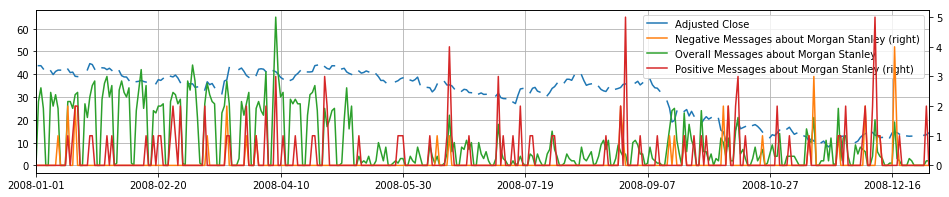

In [85]:
MS2008 = morgenStanley.loc['2008-01-01':'2008-12-31']

stocks_mediaMS = pd.DataFrame({"Adjusted Close": MS2008["Adj Close"], 
                    "Overall Messages about Morgan Stanley": reuters["Morgan_Stanley_count"],
                       "Positive Messages about Morgan Stanley": reuters["Morgan_Stanley_positive_count"],
                       "Negative Messages about Morgan Stanley": reuters["Morgan_Stanley_negative_count"]})
                    
stocks_mediaMS.plot(grid = True, figsize=(16,3), secondary_y=["Positive Messages about Morgan Stanley", "Negative Messages about Morgan Stanley"])      



## Black Rock

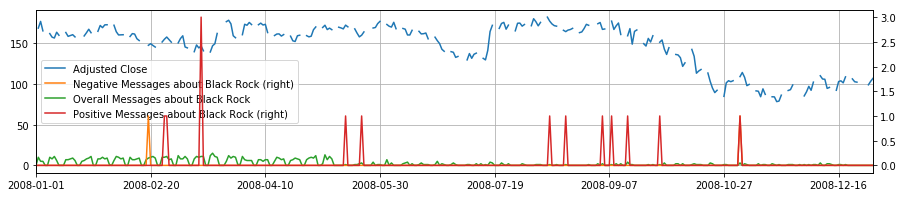

In [21]:
BR2008 = blackrock.loc['2008-01-01':'2008-12-31']

stocks_mediaBR = pd.DataFrame({"Adjusted Close": BR2008["Adj Close"], 
                        "Overall Messages about Black Rock": reuters["BlackRock_count"],
                       "Positive Messages about Black Rock": reuters["BlackRock_positive_count"],
                       "Negative Messages about Black Rock": reuters["BlackRock_negative_count"]})
                    
stocks_mediaBR.plot(grid = True, figsize=(15,3), secondary_y=["Positive Messages about Black Rock", "Negative Messages about Black Rock"])      



# Word Clouds

In [23]:
PATH = ''
df_reu = pd.read_csv(PATH+'reuters_2008.csv.gz', parse_dates=['Time']).set_index('Time')

In [24]:
df_reu.head()

,Short_Msg
Time,
2008-01-02 04:59:53,UPDATE 1-Woodside shuts Karratha gas plant due...
2008-01-02 04:56:29,Bhutan announces results of first vote
2008-01-02 04:54:29,Djokovic reveling in mixed format at Hopman Cup
2008-01-02 04:50:30,S.Korea's C&Heavy says wins $475 mln ship order
2007-12-31 14:36:24,"M/I Homes sells land, exits a Florida market"


In [25]:
messages_list = df_reu['Short_Msg'].tolist()

In [230]:
blr = df_reu[df_reu['Short_Msg'].str.match('BlackRock')] 
blr.head()

,Short_Msg
Time,
2008-01-02 14:52:24,BlackRock Group - Rule 8.3- Xstrata Plc
2008-01-02 14:50:18,BlackRock Group - Rule 8.3- Rio Tinto Plc
2008-01-02 14:48:30,BlackRock Group - Rule 8.3- BHP Billiton Plc
2008-01-02 14:46:36,BlackRock Group - Rule 8.3- BHP Billiton Ltd
2008-01-02 12:31:15,BlackRock Group - Rule 8.3- BHP Billiton Ltd


In [231]:
texts = list(blr.Short_Msg)
texts = " ".join(list(blr.Short_Msg))
#texts

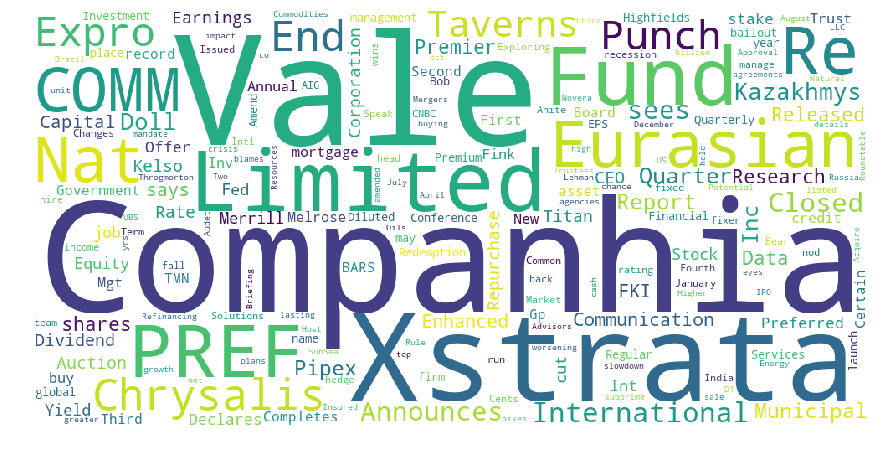

<function matplotlib.pyplot.close>

In [94]:

from wordcloud import WordCloud, STOPWORDS
 
my_stopwords = set(['BlackRock', 'Group', 'Rule 8.3', 'Trio', 'Rio', 'Ltd', 'BHP', 'PLC',  'Tinto', 'Billiton'])
ur_stopwords = set(STOPWORDS)

wordcloud = WordCloud(collocations=False,
                    background_color='white',
                    width = 1000, 
                      height = 500,
                      stopwords = my_stopwords.union(ur_stopwords)).generate(texts)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close



## Stock Rate by Sectors

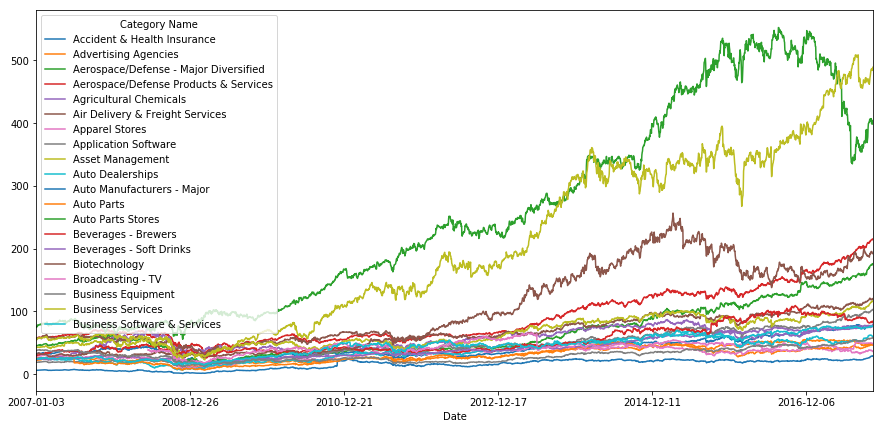

In [225]:
fig, ax = plt.subplots(figsize=(15,7))


df_merged = df_stock.reset_index().merge(tickerDic, how="left").set_index('Date')
#df_merged.reset_index(level=0, inplace=True)
#df_smaller = df_merged[['Open', 'High', 'Low','Close', 'Adj Close', 'Volume','Category Name']].copy()
df_smaller = df_merged[['Adj Close','Category Name']].copy()

df_smaller
df_groupy_by = df_smaller.groupby(['Date', 'Category Name']).mean()
#df_groupy_by.unstack().iloc[:, 0: 20].plot(ax=ax)


df_groupy_by.unstack()['Adj Close'].iloc[:,0: 20].plot(ax=ax)


In [229]:
df_groupy_by.unstack()['Adj Close'].iloc[:,21: 40].plot(ax=ax)
